In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [3]:
ls

 3scenes/                            LDA.ipynb
 classify_gambar.ipynb               lvq_classification_imbalance.ipynb
 classify.ipynb                      LVQClassifier.py
 cnn.ipynb                          'LVQ_examples (1).ipynb'
 coast/                              LVQ_examples.ipynb
'Copy of classification (1).ipynb'   LVQ.ipynb
'Copy of classification.ipynb'       LVQ_py2.ipynb
 DATA_PERFORMANCE_Human1.csv         mlp_alpha.ipynb
 DATA_PERFORMANCE_Human.csv          mpl_training_curve.ipynb
 deep_tensoflow2.ipynb               nn_iris.ipynb
 Deep_Tensoflow.ipynb                PCA.ipynb
 Encoder_decoder.ipynb               project1.ipynb
 example/                            Project1_j.ipynb
 FA.ipynb                            __pycache__/
 forest/                             sgd_comparison.ipynb
 highway/                            Untitled0.ipynb
 Latihan_nlp.ipynb


In [0]:
# import the necessary packages
from statistics import mode 
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Prerocessing

In [5]:
# grab all image paths in the input dataset directory, initialize our
# list of extracted features and corresponding labels
print("[INFO] extracting data features...")
df2 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DATA_PERFORMANCE_Human1.csv')
df_HPR = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DATA_PERFORMANCE_Human.csv')
df_HPR.head()

[INFO] extracting data features...


,Nama orang,Pangkat,talent_cluster,indeks_kesehatan,nilai_Kompetensi,nilai_Behavior,absen_tertekan,absen_nyaman,absen_semangat,engagement_ucapan,engagement_tinggal,engagement_berjuang,performansi_individu
0,1,III,POTENTIAL,C,1.22,4.27,1.0,0.0,182.0,5.00,5.00,5.33,NaN
1,2,II,POTENTIAL,0,0.88,4.02,0.0,1.0,62.0,7.00,7.00,7.00,NaN
2,3,IV,POTENTIAL,0,1.14,3.77,0.0,0.0,113.0,5.00,5.67,6.00,NaN
3,4,IV,POTENTIAL,B1,1.29,4.50,0.0,2.0,156.0,5.00,5.00,6.00,96.96
4,5,IV,POTENTIAL,B2,1.37,4.17,1.0,229.0,1.0,6.67,5.67,5.67,96.70


In [6]:
#counting missing value
print(df_HPR.isnull().sum())
df_HPR.shape

Nama orang                 0
Pangkat                  139
talent_cluster             0
indeks_kesehatan           0
nilai_Kompetensi           0
nilai_Behavior             0
absen_tertekan          1891
absen_nyaman            1891
absen_semangat          1891
engagement_ucapan          0
engagement_tinggal         0
engagement_berjuang        0
performansi_individu    4741
dtype: int64


(11668, 13)

In [7]:
# drop rows with missing values
df_HPR.dropna(inplace=True)
df_HPR.shape

(6878, 13)

In [8]:
#check missing value
df_HPR.isnull().sum()

Nama orang              0
Pangkat                 0
talent_cluster          0
indeks_kesehatan        0
nilai_Kompetensi        0
nilai_Behavior          0
absen_tertekan          0
absen_nyaman            0
absen_semangat          0
engagement_ucapan       0
engagement_tinggal      0
engagement_berjuang     0
performansi_individu    0
dtype: int64

In [9]:
#drop atribut
df_HPR = df_HPR.drop(columns = ['Nama orang', 'absen_semangat','indeks_kesehatan'])
#df_HPR = df_HPR.drop(columns = ['Nama orang','nilai_Kompetensi' ])
df_HPR

,Pangkat,talent_cluster,nilai_Kompetensi,nilai_Behavior,absen_tertekan,absen_nyaman,engagement_ucapan,engagement_tinggal,engagement_berjuang,performansi_individu
3,IV,POTENTIAL,1.29,4.50,0.0,2.0,5.00,5.00,6.00,96.96
4,IV,POTENTIAL,1.37,4.17,1.0,229.0,6.67,5.67,5.67,96.70
8,IV,POTENTIAL,0.85,3.85,0.0,0.0,6.33,7.00,6.00,99.27
10,V,POTENTIAL,1.15,3.53,0.0,64.0,4.33,6.67,6.67,97.39
12,IV,HIGH POTENTIAL,0.96,3.66,0.0,0.0,6.00,7.00,7.00,99.69
15,IV,POTENTIAL,1.25,4.28,0.0,0.0,5.00,5.00,5.00,96.03
18,IV,POTENTIAL,1.33,4.28,1.0,122.0,7.00,7.00,7.00,98.12
19,III,POTENTIAL,1.12,4.23,39.0,1.0,5.33,6.67,6.33,99.04
21,IV,POTENTIAL,1.46,4.13,0.0,0.0,7.00,7.00,7.00,85.26
26,IV,POTENTIAL,0.88,3.19,3.0,0.0,6.67,7.00,7.00,103.68


In [10]:
#tampil df2
#untuk prediction
df2 = df2.drop(columns =['Nama orang', 'absen_semangat','performansi_individu','indeks_kesehatan'])
df2

,Pangkat,talent_cluster,nilai_Kompetensi,nilai_Behavior,absen_tertekan,absen_nyaman,engagement_ucapan,engagement_tinggal,engagement_berjuang
0,III,POTENTIAL,1.22,4.27,1,0,5.00,5.00,5.33
1,V,POTENTIAL,0.97,3.58,0,64,7.00,7.00,7.00
2,IV,POTENTIAL,1.19,3.81,0,15,7.00,7.00,7.00
3,IV,POTENTIAL,1.15,3.53,0,109,7.00,6.33,7.00
4,V,POTENTIAL,0.09,2.64,0,1,6.67,6.00,7.00
5,V,POTENTIAL,0.82,3.67,0,140,6.67,7.00,7.00
6,IV,POTENTIAL,1.25,4.24,0,2,6.67,7.00,7.00
7,V,POTENTIAL,1.47,4.41,0,5,6.00,6.00,6.00
8,IV,POTENTIAL,1.02,3.24,0,8,7.00,6.67,7.00
9,IV,POTENTIAL,1.13,3.64,0,0,5.00,6.00,5.33


In [11]:
#menghitung nilai tertinggi dan terendah
dfPerform=df_HPR.iloc[:,9]
dfMaxper=dfPerform.max()
dfMinper=dfPerform.min()
print('Nilai Max Performance:',dfMaxper)
print('Nilai Min Performance:',dfMinper)

Nilai Max Performance: 113.26
Nilai Min Performance: 85.26


In [12]:
#penentuan 4 titik untuk menentukan kelas
dfrange=dfMaxper-dfMinper
titik1=dfMinper+(dfrange*(1/5))
titik2=dfMinper+(dfrange*(2/5))
titik3=dfMinper+(dfrange*(3/5))
titik4=dfMinper+(dfrange*(4/5))

#penentuan kelas
print('Kelas 1 nilainya :<',titik1)
print('Kelas 2 nilainya :<=',titik2)
print('Kelas 3 nilainya :<=',titik3)
print('Kelas 4 nilainya :<=',titik4)
print('Kelas 5 nilainya :>=',titik4)


Kelas 1 nilainya :< 90.86
Kelas 2 nilainya :<= 96.46000000000001
Kelas 3 nilainya :<= 102.06
Kelas 4 nilainya :<= 107.66000000000001
Kelas 5 nilainya :>= 107.66000000000001


In [0]:
df_HPR.loc[df_HPR['performansi_individu'] < titik1,'performansi_individu']=0
df_HPR.loc[(df_HPR['performansi_individu'] >= titik1) &(df_HPR['performansi_individu'] < titik2),'performansi_individu']=1
df_HPR.loc[(df_HPR['performansi_individu'] >= titik2) &(df_HPR['performansi_individu'] < titik3),'performansi_individu']=2
df_HPR.loc[(df_HPR['performansi_individu'] >= titik3) &(df_HPR['performansi_individu'] < titik4),'performansi_individu']=3
df_HPR.loc[(df_HPR['performansi_individu'] >= titik4),'performansi_individu']=4

df_HPR.loc[(df_HPR['performansi_individu'] == 0),'performansi_individu']='Very Low'
df_HPR.loc[(df_HPR['performansi_individu'] == 1),'performansi_individu']='Low'
df_HPR.loc[(df_HPR['performansi_individu'] == 2),'performansi_individu']='Medium'
df_HPR.loc[(df_HPR['performansi_individu'] == 3),'performansi_individu']='High'
df_HPR.loc[(df_HPR['performansi_individu'] == 4),'performansi_individu']='Very High'


In [14]:
df_HPR

,Pangkat,talent_cluster,nilai_Kompetensi,nilai_Behavior,absen_tertekan,absen_nyaman,engagement_ucapan,engagement_tinggal,engagement_berjuang,performansi_individu
3,IV,POTENTIAL,1.29,4.50,0.0,2.0,5.00,5.00,6.00,Medium
4,IV,POTENTIAL,1.37,4.17,1.0,229.0,6.67,5.67,5.67,Medium
8,IV,POTENTIAL,0.85,3.85,0.0,0.0,6.33,7.00,6.00,Medium
10,V,POTENTIAL,1.15,3.53,0.0,64.0,4.33,6.67,6.67,Medium
12,IV,HIGH POTENTIAL,0.96,3.66,0.0,0.0,6.00,7.00,7.00,Medium
15,IV,POTENTIAL,1.25,4.28,0.0,0.0,5.00,5.00,5.00,Low
18,IV,POTENTIAL,1.33,4.28,1.0,122.0,7.00,7.00,7.00,Medium
19,III,POTENTIAL,1.12,4.23,39.0,1.0,5.33,6.67,6.33,Medium
21,IV,POTENTIAL,1.46,4.13,0.0,0.0,7.00,7.00,7.00,Very Low
26,IV,POTENTIAL,0.88,3.19,3.0,0.0,6.67,7.00,7.00,High


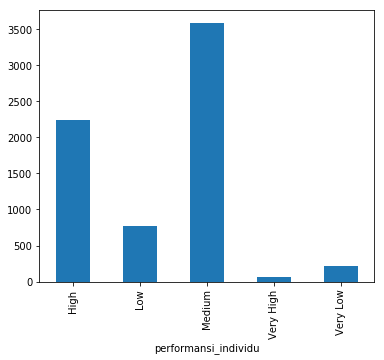

In [15]:
fig=plt.figure(figsize=(6,5))
df_HPR.groupby('performansi_individu').performansi_individu.count().plot.bar(ylim=0)
plt.show()

# ANN

In [0]:
le = LabelEncoder()

df_HPR['Pangkat'] = le.fit_transform(df_HPR.Pangkat)
df_HPR['talent_cluster']=le.fit_transform(df_HPR.talent_cluster)
#df_HPR['indeks_kesehatan'] = le.fit_transform(df_HPR.indeks_kesehatan)
#df_HPR['performansi_individu'] = le.fit_transform(df_HPR.performansi_individu)

labels = df_HPR.performansi_individu
df_HPR = df_HPR.drop(columns = ['performansi_individu'])

x_train, x_test, y_train, y_test = train_test_split(df_HPR, labels, 
                                                 random_state=3, test_size=0.25,stratify=labels)



In [17]:
df_HPR.head()

,Pangkat,talent_cluster,nilai_Kompetensi,nilai_Behavior,absen_tertekan,absen_nyaman,engagement_ucapan,engagement_tinggal,engagement_berjuang
3,3,1,1.29,4.50,0.0,2.0,5.00,5.00,6.00
4,3,1,1.37,4.17,1.0,229.0,6.67,5.67,5.67
8,3,1,0.85,3.85,0.0,0.0,6.33,7.00,6.00
10,4,1,1.15,3.53,0.0,64.0,4.33,6.67,6.67
12,3,0,0.96,3.66,0.0,0.0,6.00,7.00,7.00


In [18]:
np.unique(y_train)

array(['High', 'Low', 'Medium', 'Very High', 'Very Low'], dtype=object)

In [19]:
np.unique(y_test)

array(['High', 'Low', 'Medium', 'Very High', 'Very Low'], dtype=object)

In [20]:
y_train=le.fit_transform(y_train)
y_test=le.fit_transform(y_test)
y_test[0:10]

array([2, 1, 0, 0, 0, 0, 0, 1, 1, 2])

In [21]:
list(le.classes_)

['High', 'Low', 'Medium', 'Very High', 'Very Low']

In [0]:
mlp = MLPClassifier(solver='adam', alpha=0.2, random_state=1, hidden_layer_sizes=(300,300), max_iter=200)

In [23]:
#train model
print("[INFO] using '{}' model".format("mlp"))
mlp.fit(x_train, y_train)

[INFO] using 'mlp' model


MLPClassifier(activation='relu', alpha=0.2, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(300, 300), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [24]:
print("[INFO] evaluation...")
predictions = mlp.predict(x_test)
predictions

[INFO] evaluation...


array([2, 0, 2, ..., 2, 2, 2])

In [25]:
cmatrix=confusion_matrix(y_test, predictions)
print(cmatrix)

[[134   0 425   0   0]
 [ 44   0 149   0   0]
 [111   1 784   0   0]
 [  2   0  15   0   0]
 [ 15   0  40   0   0]]


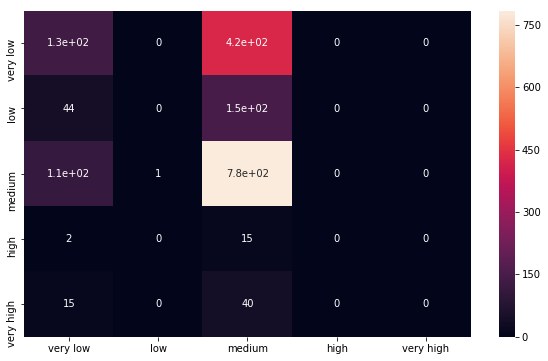

In [26]:
lebel=['very low', 'low', 'medium', 'high', 'very high']
dfc=pd.DataFrame(cmatrix,lebel,lebel)
plt.figure(figsize=(10,6))
sns.heatmap(dfc, annot=True)


In [27]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.44      0.24      0.31       559
           1       0.00      0.00      0.00       193
           2       0.55      0.88      0.68       896
           3       0.00      0.00      0.00        17
           4       0.00      0.00      0.00        55

    accuracy                           0.53      1720
   macro avg       0.20      0.22      0.20      1720
weighted avg       0.43      0.53      0.45      1720



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [28]:
akurasi = accuracy_score(y_test, predictions)
print(akurasi)

0.5337209302325582


In [0]:
test_X=np.array(x_test)
test_Y=np.array(y_test)

In [30]:
print(test_X[100])
#print(test_Y.shape)
print(test_Y[100])

[ 5.    2.    1.09  4.16  0.   35.    7.    6.    6.67]
0


In [31]:
print(le.classes_[test_Y[100]])

High


In [32]:
check=test_X[100].reshape(1,-1)
predictions1 = mlp.predict(check)
print(le.classes_[predictions1])

['Medium']


# Prediction

In [0]:
#prediksi data
df2['Pangkat'] = le.fit_transform(df2.Pangkat)
df2['talent_cluster']=le.fit_transform(df2.talent_cluster)
#df2['indeks_kesehatan'] = le.fit_transform(df2.indeks_kesehatan)
predictions2 = mlp.predict(df2)

In [34]:
predictions2

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2])

In [39]:
predictions2.shape

(40,)

In [51]:
print(predictions2)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 0 2 2 2
 2 2 2]
